In [54]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [55]:
train_data = pd.read_csv("../data/model_train_data.csv")
test_data = pd.read_csv("../data/model_test_data.csv")

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      5398 non-null   int64  
 1   location                                 5398 non-null   object 
 2   occupation                               5398 non-null   object 
 3   income_level                             5398 non-null   int64  
 4   fico_score                               5398 non-null   float64
 5   delinquency_status                       5398 non-null   int64  
 6   charge_off_status                        5398 non-null   int64  
 7   number_of_credit_applications            5398 non-null   int64  
 8   debt_to_income_ratio                     5398 non-null   float64
 9   payment_methods_high_risk                5398 non-null   int64  
 10  max_balance                              5398 no

## Standardizing numerical features

In [57]:
numerical_features = ["age",
                      "fico_score",
                      "income_level",
                      "delinquency_status",
                      "max_balance",
                      "avg_balance_last_12months",
                      "account_age_days",
                     "earliest_credit_account_age_days",
                      "days_recent_trade_activity",
                      "new_accounts_opened_last_12months",
                     "number_of_delinquent_accounts",
                      "number_of_defaulted_accounts",
                      "number_of_credit_applications",
                      "debt_to_income_ratio"]

scaler = StandardScaler()

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

In [58]:
train_data.describe()

,age,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,avg_balance_last_12months,...,number_of_defaulted_accounts,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag,account_age_days,earliest_credit_account_age_days,days_recent_trade_activity
count,5.398000e+03,5.398000e+03,5.398000e+03,5.398000e+03,5398.000000,5.398000e+03,5398.000000,5398.000000,5.398000e+03,5.398000e+03,...,5.398000e+03,5.398000e+03,5398.00000,5398.000000,5398.000000,5398.000000,5398.000000,5.398000e+03,5.398000e+03,5.398000e+03
mean,2.125836e-16,4.738707e-17,-3.323676e-16,-6.055014e-17,0.263616,-2.632615e-18,0.000000,0.238977,-6.713168e-17,9.477413e-17,...,7.371321e-17,1.059627e-16,0.25917,0.207670,0.312338,0.123935,0.201000,4.409630e-17,-2.632615e-17,-7.173875e-17
std,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,0.440634,1.000093e+00,1.000093,0.426498,1.000093e+00,1.000093e+00,...,1.000093e+00,1.000093e+00,0.43822,0.405676,0.463490,0.329538,0.400785,1.000093e+00,1.000093e+00,1.000093e+00
min,-1.719819e+00,-9.838981e-01,-2.416398e+00,-5.937267e-01,0.000000,-4.225377e-01,-1.531616,0.000000,-9.888567e-01,-1.508166e+00,...,-6.896353e-01,-8.712841e-01,0.00000,0.000000,0.000000,0.000000,0.000000,-1.754485e+00,-1.730164e+00,-1.712899e+00
25%,-8.667501e-01,-7.618918e-01,-7.317029e-01,-5.937267e-01,0.000000,-4.225377e-01,-0.629592,0.000000,-4.992503e-01,-8.776901e-01,...,-6.896353e-01,-8.712841e-01,0.00000,0.000000,0.000000,0.000000,0.000000,-8.584664e-01,-8.578760e-01,-8.736804e-01
50%,-1.368125e-02,-3.952562e-01,1.375688e-01,-5.937267e-01,0.000000,-4.225377e-01,-0.232961,0.000000,-1.122720e-01,-1.340544e-01,...,-6.896353e-01,-8.712841e-01,0.00000,0.000000,0.000000,0.000000,0.000000,1.086252e-02,-1.468802e-02,3.256104e-03
75%,9.003211e-01,6.353869e-01,8.145238e-01,1.287673e-01,1.000000,-4.225377e-01,0.359638,0.000000,3.936763e-01,7.973250e-01,...,6.729750e-01,1.008489e+00,1.00000,0.000000,1.000000,0.000000,0.000000,8.630337e-01,8.745354e-01,8.519043e-01
max,1.692457e+00,3.493665e+00,1.791493e+00,2.179718e+00,1.000000,4.113977e+00,12.622658,1.000000,1.910438e+01,2.705906e+00,...,2.035585e+00,1.635080e+00,1.00000,1.000000,1.000000,1.000000,1.000000,1.726643e+00,1.754218e+00,1.728841e+00


## Seperate Features and Target

In [59]:
target = 'charge_off_status'

X_train = train_data.drop(columns=[target])  
y_train = train_data[target]  

X_test = test_data.drop(columns=[target])  
y_test = test_data[target]  

In [60]:
print(X_train.shape)  
print(y_train.shape) 
print(X_test.shape)   
print(y_test.shape)   

(5398, 23)
(5398,)
(1350, 23)
(1350,)


## One-hot encoding categorical features

In [61]:
categorical_features = ["occupation", "location","delinquency_group"]

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

encoded_columns = encoder.get_feature_names_out(categorical_features)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_columns)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_columns)

X_train = X_train.drop(columns=categorical_features).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_features).reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

## Training Logistic Regression Model (Basic)

In [62]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [63]:
y_pred = log_reg.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob)}")


Accuracy: 0.8711111111111111
Confusion Matrix:
[[954  60]
 [114 222]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1014
           1       0.79      0.66      0.72       336

    accuracy                           0.87      1350
   macro avg       0.84      0.80      0.82      1350
weighted avg       0.87      0.87      0.87      1350

ROC-AUC Score: 0.8302103879026956


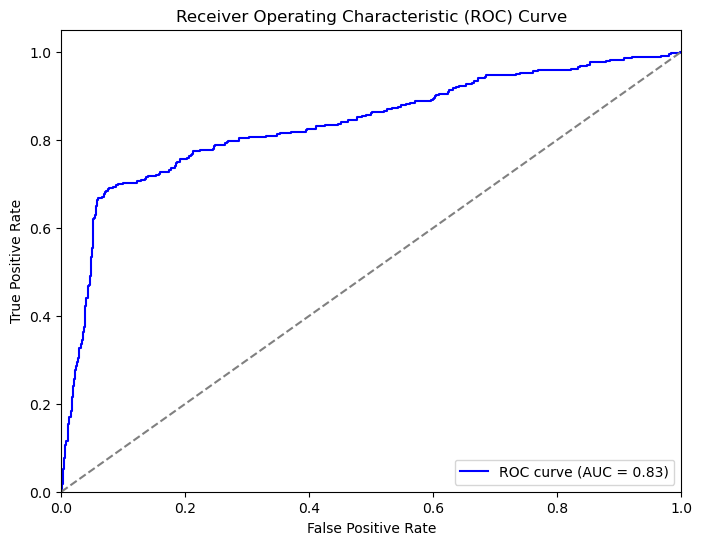

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


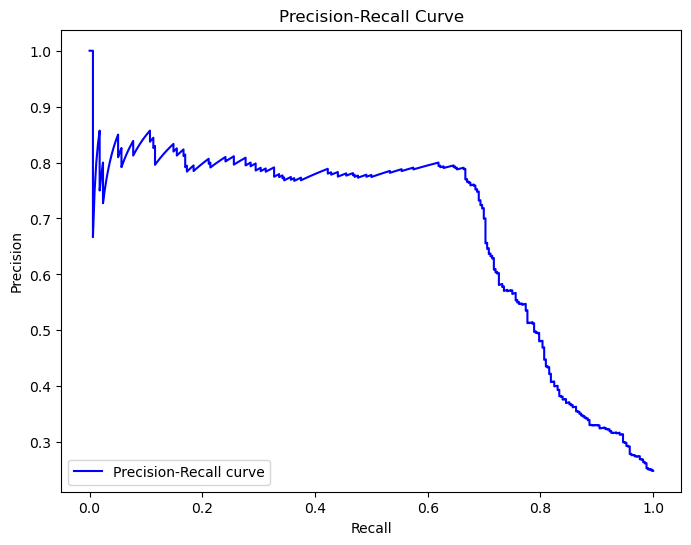

In [53]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
